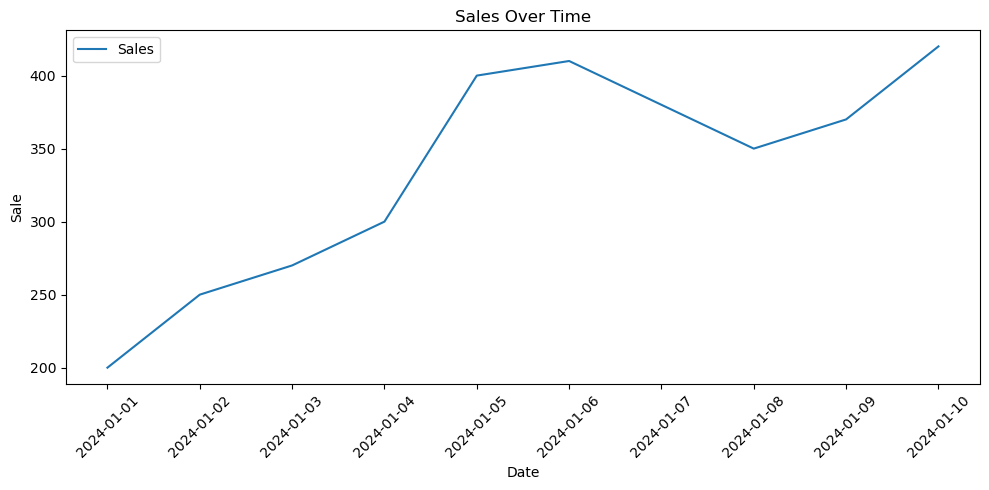

In [19]:
# Attempt with the week 7 generated example data
# Generate time-series data
import pandas as pd
import matplotlib.pyplot as plt
data = {
 'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
 'Sales': [200, 250, 270, 300, 400, 410, 380, 350, 370, 420]
}
df = pd.DataFrame(data)

 # Plotting the sales
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

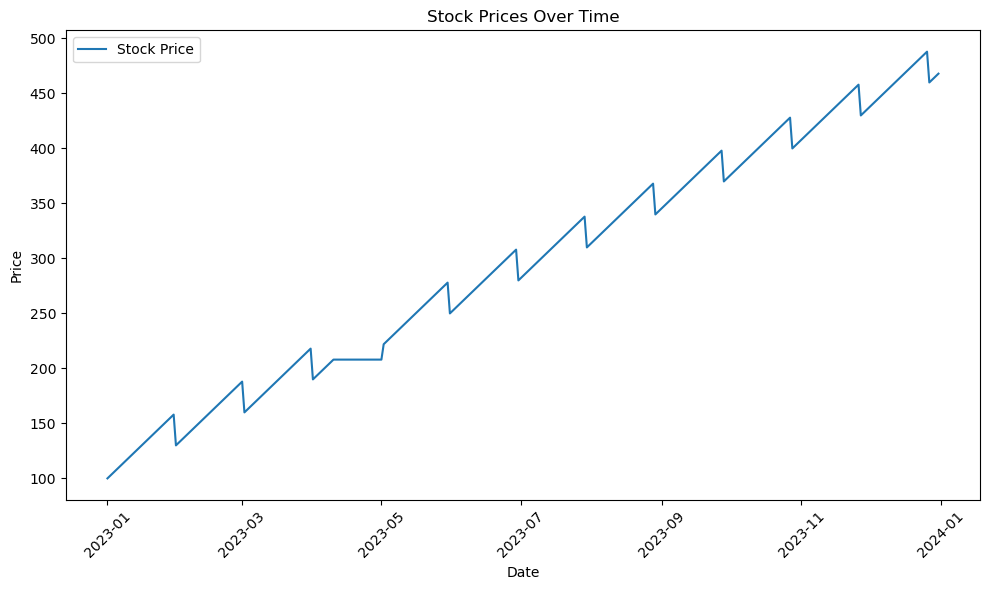

In [9]:
# Day 1: Visualizing Time-Series Data
# Task 1: Plotting Stock Prices over Time
# Generate time-series data
# Sample dataset (replace with actual data)
import pandas as pd
import matplotlib.pyplot as plt

# Generate time-series data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Stock Price': [100 + x + (x % 30) for x in range(365)]
}
df = pd.DataFrame(data)

# Simulate missing data
df.loc[100:120, 'Stock Price'] = None  # 'Stock Price' column had missing values

# Fill missing values by forward fill
df['Stock Price'].ffill(inplace=True)

# Plotting the stock prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Stock Price'], label='Stock Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
print(df.columns)


Index(['Date', 'Sales'], dtype='object')


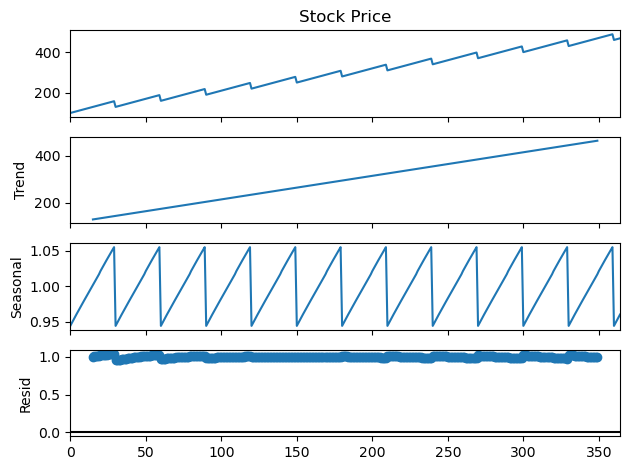

In [25]:
# Task 2: Visualizing Seasonality and Trends
# Solution 1: Use period=30 for Monthly Seasonality (One Year of Data)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate time-series data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Stock Price': [100 + x + (x % 30) for x in range(365)]
}
df = pd.DataFrame(data)

# Ensure the 'Stock Price' column is numeric
df['Stock Price'] = pd.to_numeric(df['Stock Price'], errors='coerce')

# Perform seasonal decomposition with period=30 (monthly seasonality)
result = seasonal_decompose(df['Stock Price'], model='multiplicative', period=30)

# Plot the decomposition
result.plot()
plt.show()



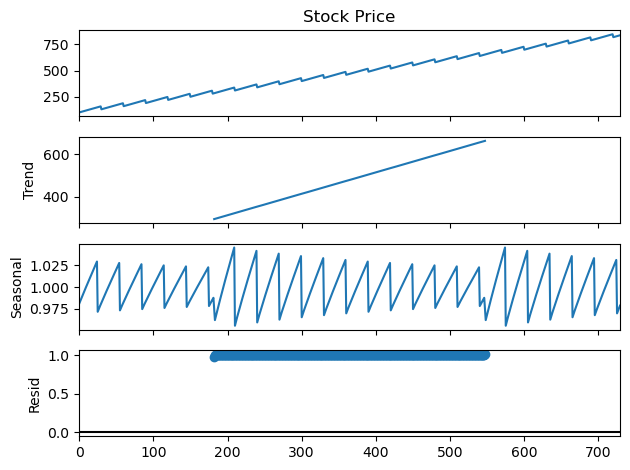

In [26]:
# Task 2: Visualizing Seasonality and Trends
# Solution 2: Extend the Data to 2 Years (730 Observations) for Yearly Seasonality
# Generate two years of time-series data (730 observations)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=730, freq='D'),  # Two years of daily data
    'Stock Price': [100 + x + (x % 30) for x in range(730)]  # Extended to two years
}
df = pd.DataFrame(data)

# Ensure the 'Stock Price' column is numeric
df['Stock Price'] = pd.to_numeric(df['Stock Price'], errors='coerce')

# Perform seasonal decomposition with period=365 (two years of data)
result = seasonal_decompose(df['Stock Price'], model='multiplicative', period=365)

# Plot the decomposition
result.plot()
plt.show()


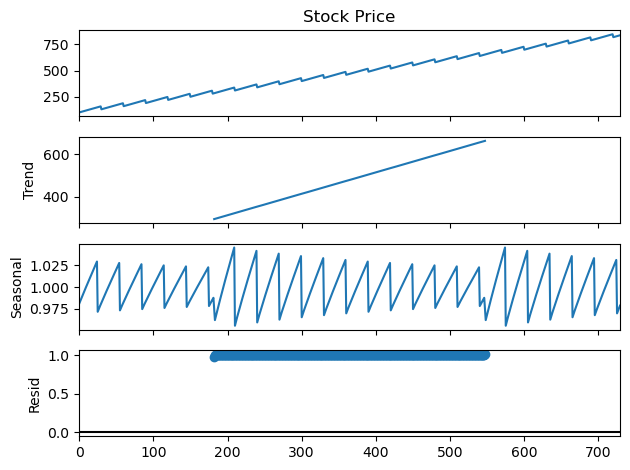

In [27]:
# Task 3: Visualizing Daily Temperature Trends
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df['Stock Price'] is already in the correct format
result = seasonal_decompose(df['Stock Price'], model='multiplicative', period=365)

# Plot the decomposition
result.plot()
plt.show()

# Explanation of components:
# Trend: The underlying trend over time.
# Seasonality: Patterns that repeat at regular intervals (e.g., yearly).
# Residual: What's left after removing trend and seasonality.


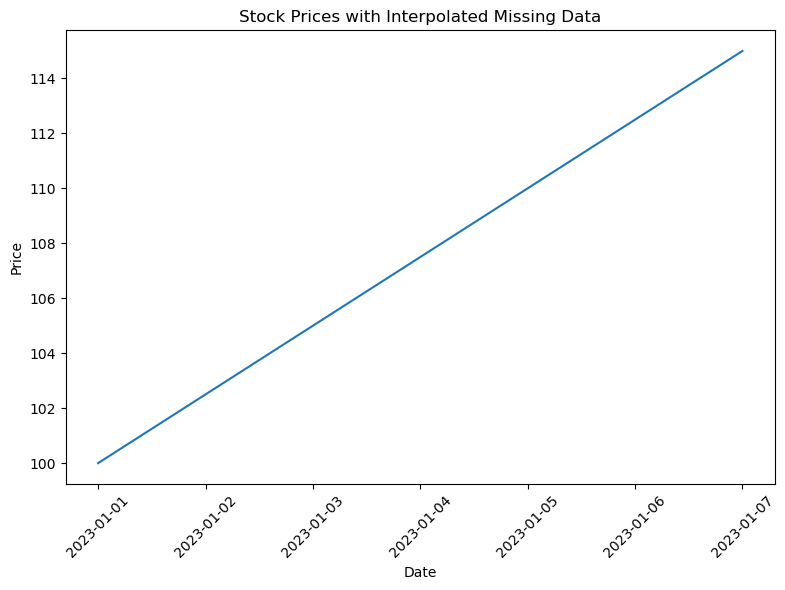

In [29]:
# Task 4: Handling Irregular Time Intervals
# Sample dataset with irregular intervals
df_irregular = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Stock Price': [100, 105, 110, 115]
})
df_irregular['Date'] = pd.to_datetime(df_irregular['Date'])
df_irregular.set_index('Date', inplace=True)

# Interpolate missing dates
df_irregular_resampled = df_irregular.resample('D').interpolate(method='linear')

# Plotting the result
plt.figure(figsize=(8, 6))
plt.plot(df_irregular_resampled.index, df_irregular_resampled['Stock Price'], label='Interpolated Stock Prices')
plt.title('Stock Prices with Interpolated Missing Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 2.0 MB/s eta 0:00:00.1 MB/s eta 0:00:01


In [4]:
!pip show folium

Name: folium
Version: 0.18.0
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: /home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/.local/lib/python3.10/site-packages
Requires: branca, jinja2, numpy, requests, xyzservices
Required-by: 


In [6]:
import sys
print(sys.executable)

/opt/conda/envs/anaconda-2024.02-py310/bin/python


In [7]:
!which python

/opt/conda/envs/anaconda-2024.02-py310/bin/python


In [8]:
!pip install --upgrade --user folium

Looking in links: /usr/share/pip-wheels


In [1]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import folium
print(folium.__version__)

0.18.0


In [5]:
import pandas as pd
import folium

# Sample dataset (replace with actual data)
cities = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Latitude': [40.7128, 34.0522, 41.8781, 29.7604, 33.4484],
    'Longitude': [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740],
    'Sales': [1000, 1500, 1200, 1300, 1100]
}

# Convert the dictionary to a DataFrame
df_cities = pd.DataFrame(cities)

# Create a map centered around the US
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add markers for each city on the map
for _, city in df_cities.iterrows():
    folium.Marker(
        location=[city['Latitude'], city['Longitude']],
        popup=f"City: {city['City']}<br>Sales: {city['Sales']}",
    ).add_to(m)

# Display the map
m.save("sales_map.html")


In [18]:
from IPython.display import IFrame

# Display the saved HTML map in the notebook
IFrame('sales_map.html', width=700, height=500)

In [8]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 47.3 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 85.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.3 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
import geopandas as gpd
print(gpd.__version__)  # Print version to verify

1.0.1


In [28]:
import os
print(os.path.abspath("C:/Users/HP USER/Downloads/Countries/ne_10m_admin_0_countries.shp"))


/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/C:/Users/HP USER/Downloads/Countries/ne_10m_admin_0_countries.shp


In [30]:
import os
print(os.getcwd())  # This shows the current working directory


/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b


In [31]:
# Assuming you uploaded the files to the correct path in the working directory
shapefile_path = '/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/ne_10m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)
print(world.head())


        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

In [39]:
# Check the geometry types
print(world.geometry.geom_type.value_counts())


MultiPolygon    7
Polygon         2
Name: count, dtype: int64


0       True
1       True
2       True
3       True
4       True
       ...  
253    False
254    False
255    False
256    False
257    False
Length: 258, dtype: bool


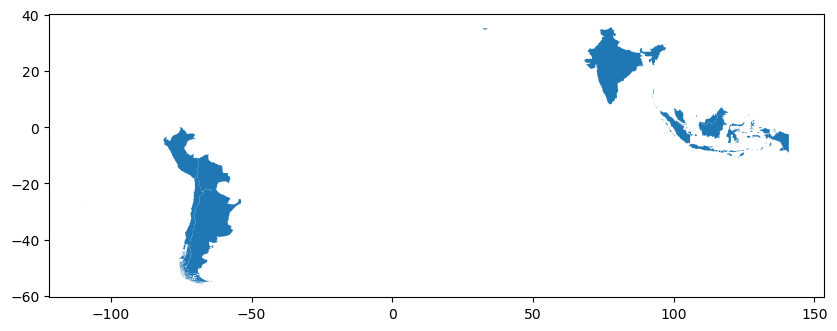

In [40]:
from shapely.geometry import Polygon, MultiPolygon

# Apply buffer(0) to invalid geometries of type Polygon and MultiPolygon
world['geometry'] = world['geometry'].apply(
    lambda geom: geom.buffer(0) if isinstance(geom, (Polygon, MultiPolygon)) and not geom.is_valid else geom
)

# Verify again if the geometries are valid
print(world.is_valid)

# Plot the world map after fixing geometries
world.plot(figsize=(10, 10))
plt.show()


In [41]:
# Find and inspect invalid geometries
invalid_geometries = world[~world.is_valid]
print(invalid_geometries)

# Optional: Inspect the geometries in detail
for idx, row in invalid_geometries.iterrows():
    print(f"Invalid geometry at index {idx}: {row['geometry']}")


          featurecla  scalerank  LABELRANK                    SOVEREIGNT  \
9    Admin-0 country          0          2                         China   
10   Admin-0 country          0          4                        Israel   
11   Admin-0 country          0          5                        Israel   
12   Admin-0 country          0          5                       Lebanon   
13   Admin-0 country          0          2                      Ethiopia   
..               ...        ...        ...                           ...   
253  Admin-0 country          0          4                         China   
254  Admin-0 country          6          5                     Australia   
255  Admin-0 country          6          8  Bajo Nuevo Bank (Petrel Is.)   
256  Admin-0 country          6          5               Serranilla Bank   
257  Admin-0 country          6          6              Scarborough Reef   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
9      CH1         1      2      

0      True
1      True
2      True
3      True
4      True
       ... 
253    True
254    True
255    True
256    True
257    True
Length: 258, dtype: bool


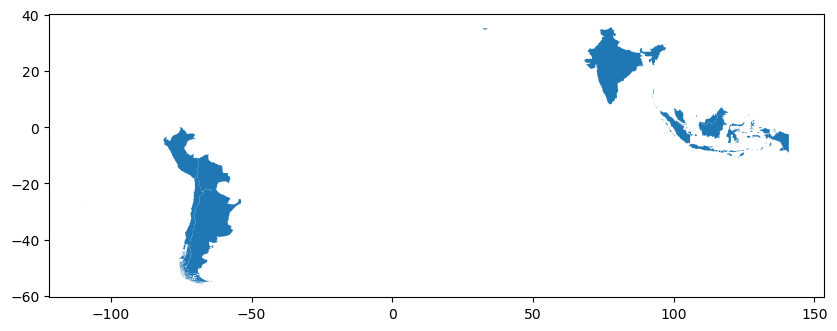

In [42]:
from shapely.geometry import Polygon

# Replace None geometries with an empty Polygon
world['geometry'] = world['geometry'].apply(lambda geom: Polygon() if geom is None else geom)

# Verify all geometries are now valid
print(world.is_valid)

# Plot the map
world.plot(figsize=(10, 10))
plt.show()

In [47]:
# Remove invalid geometries from the dataset
valid_world = world[world.is_valid]

# Save the cleaned dataset
valid_file_path = '/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/valid_ne_10m_admin_0_countries.shp'
valid_world.to_file(valid_file_path)

print(f"Cleaned shapefile saved to: {valid_file_path}")

/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/.local/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/.local/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 270625568 of field POP_EST of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/.local/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1366417754 of field POP_EST of feature 8 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/.local/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1397715000 of field POP_EST of feature 9 not successfully written. Possibly due to too larger numb

Cleaned shapefile saved to: /home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/valid_ne_10m_admin_0_countries.shp


        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

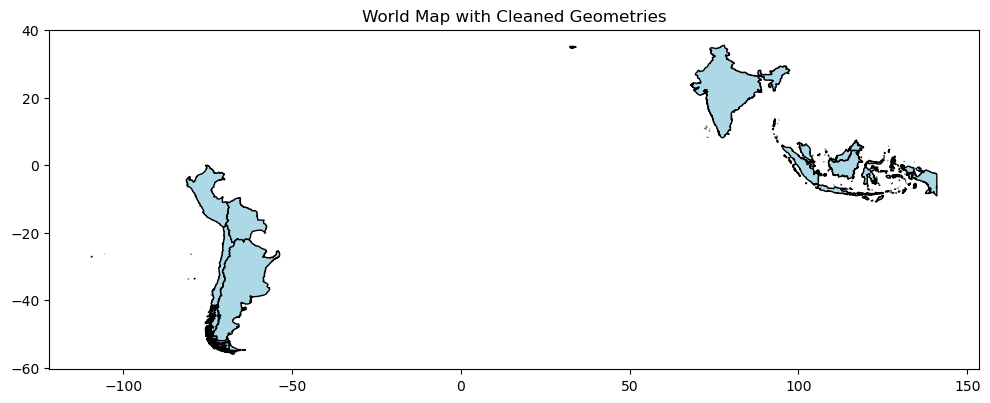

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the cleaned shapefile
cleaned_path = '/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/valid_ne_10m_admin_0_countries.shp'
cleaned_world = gpd.read_file(cleaned_path)

# Verify the dataset
print(cleaned_world.head())
print(cleaned_world.is_valid.value_counts())  # Ensure no invalid geometries remain

# Plot the cleaned dataset
cleaned_world.plot(figsize=(12, 8), color='lightblue', edgecolor='black')
plt.title('World Map with Cleaned Geometries')
plt.show()

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

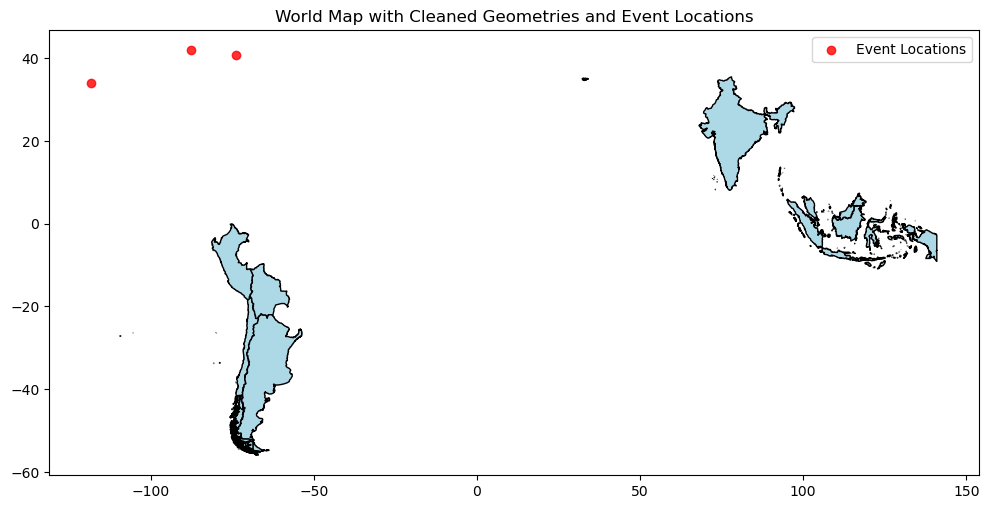

In [49]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Step 2: Load and verify cleaned data
cleaned_path = '/home/6f348dcd-6f88-48fa-ab3c-868ada9b6b8b/valid_ne_10m_admin_0_countries.shp'
cleaned_world = gpd.read_file(cleaned_path)

# Verify the dataset
print(cleaned_world.head())
print("Valid geometries count:\n", cleaned_world.is_valid.value_counts())  # Ensure all geometries are valid

# Step 3: Sample event data
events = {
    'Event': ['Event A', 'Event B', 'Event C'],
    'Latitude': [40.7128, 34.0522, 41.8781],
    'Longitude': [-74.0060, -118.2437, -87.6298]
}
df_events = gpd.GeoDataFrame(
    events, 
    geometry=[Point(xy) for xy in zip(events['Longitude'], events['Latitude'])],
    crs="EPSG:4326"  # Match CRS of world data
)

# Plot the cleaned world map with events overlay
fig, ax = plt.subplots(figsize=(12, 8))
cleaned_world.plot(ax=ax, color='lightblue', edgecolor='black')
df_events.plot(ax=ax, color='red', marker='o', label='Event Locations', alpha=0.8)
plt.title('World Map with Cleaned Geometries and Event Locations')
plt.legend()
plt.show()

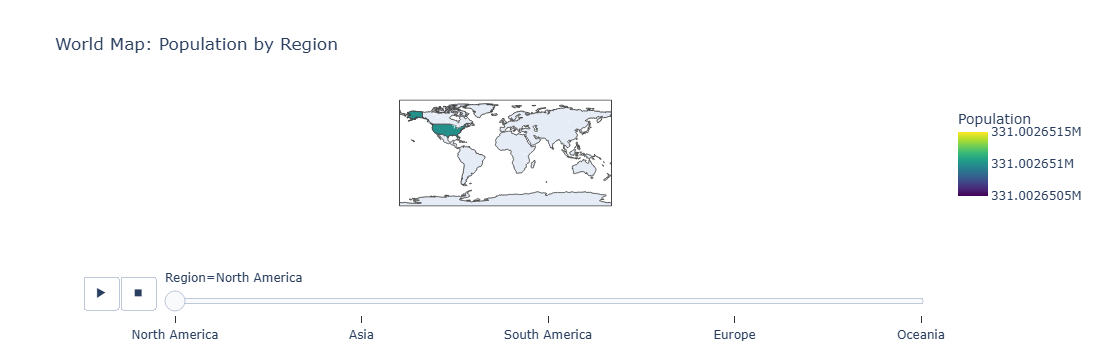

In [15]:
# 8. Visual Comparison of Numerical and Categorical Variables by Region
import plotly.express as px
import pandas as pd

# Sample dataset with numerical and categorical variables (Population and Region)
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'Germany', 'UK', 'France', 'Italy', 'Spain', 'Australia'],
    'Population': [331002651, 1439323776, 1380004385, 212559417, 83783942, 67886011, 65273511, 60244639, 46719142, 25499884],
    'Region': ['North America', 'Asia', 'Asia', 'South America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Oceania']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Visualizing Population by Region on a world map
fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",  # Specify countries
                    color="Population",  # Numerical variable
                    hover_name="Country",  # Show country name on hover
                    color_continuous_scale="Viridis",  # Color scale
                    animation_frame="Region",  # Animate by region
                    title="World Map: Population by Region"
)

# Show the plot
fig.show()

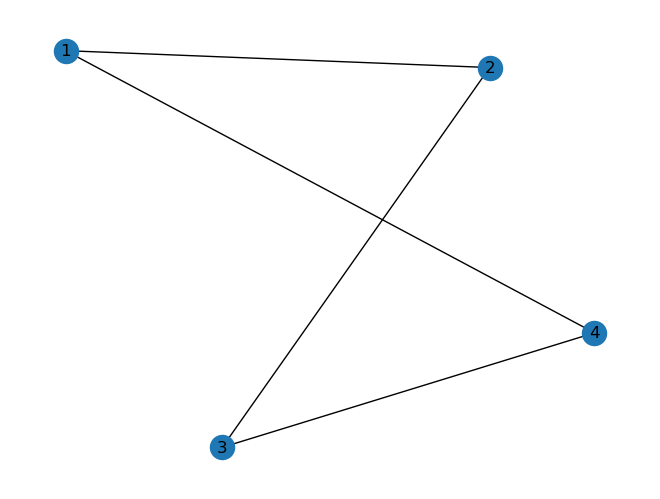

In [53]:
# Day 3: Visualizing Network Data
# Task 9: Network Graph Visualization
# Objective:Create a network graph using `networkx
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple graph
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

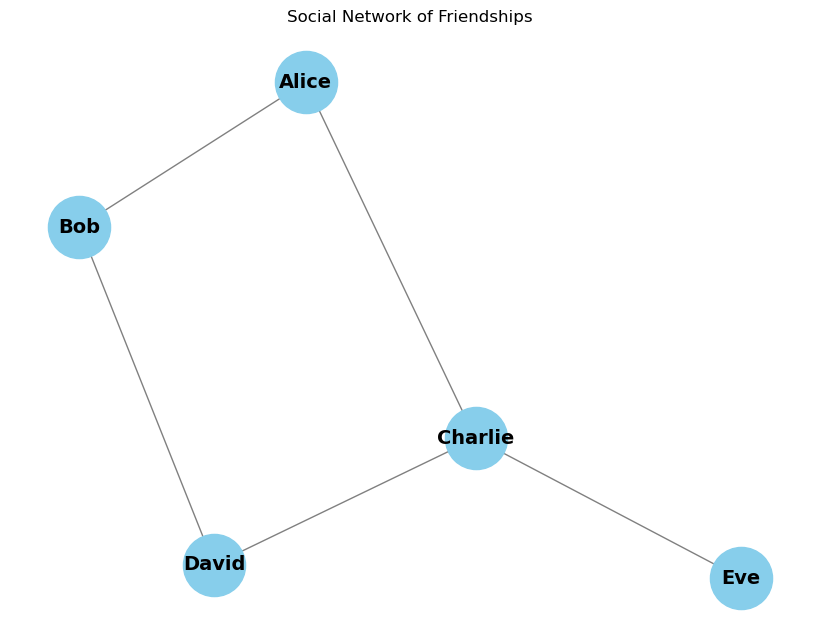

In [56]:
# Task 9b: Visualizing a Network of Friendships
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes (people)
G.add_nodes_from(['Alice', 'Bob', 'Charlie', 'David', 'Eve'])

# Add edges (friendships) between people
G.add_edges_from([('Alice', 'Bob'), 
                 ('Alice', 'Charlie'), 
                 ('Bob', 'David'), 
                 ('Charlie', 'David'),
                 ('Eve', 'Charlie')])

# Draw the network
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, font_weight='bold', edge_color='gray')

# Display the plot
plt.title("Social Network of Friendships")
plt.show()


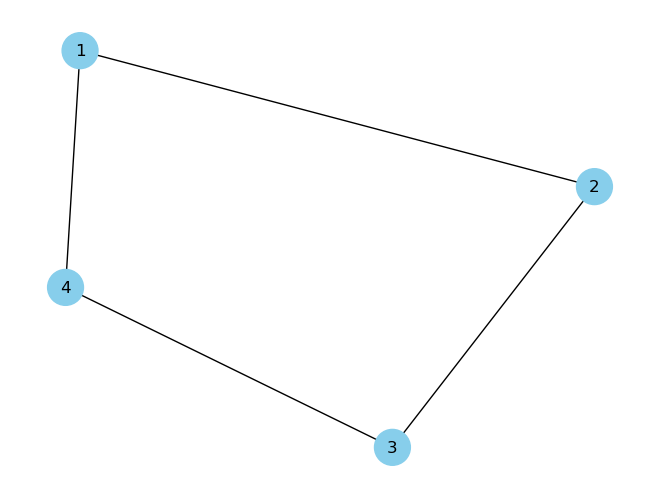

In [54]:
# Task 10: Visualizing Central Nodes in a Social Network
# Objective:Identify and highlight central nodes (influencers) in a network
# Compute degree centrality
centrality = nx.degree_centrality(G)

# Draw the graph with nodes sized by centrality
node_sizes = [centrality[node] * 1000 for node in G.nodes]
nx.draw(G, with_labels=True, node_size=node_sizes, node_color='skyblue')
plt.show()

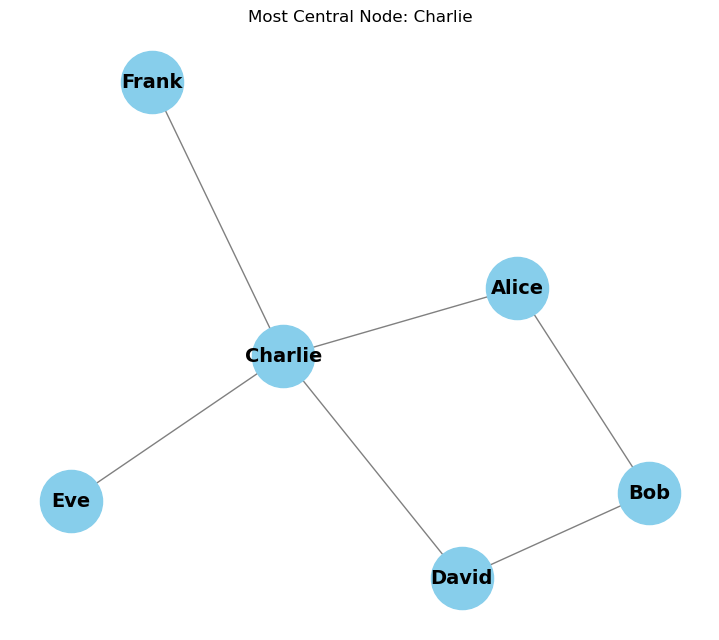

Degree Centrality of Nodes:
Alice: 0.40
Bob: 0.40
Charlie: 0.80
David: 0.40
Eve: 0.20
Frank: 0.20


In [58]:
# Task 10b: Visualizing Central Nodes (Influencers)
# Objective: The goal is to identify and highlight central nodes (influencers) in the network
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes and edges (friendships or interactions)
G.add_edges_from([('Alice', 'Bob'), 
                 ('Alice', 'Charlie'), 
                 ('Bob', 'David'), 
                 ('Charlie', 'David'),
                 ('Eve', 'Charlie'),
                 ('Charlie', 'Frank')])

# Calculate degree centrality
centrality = nx.degree_centrality(G)

# Get the node with the highest centrality
most_central_node = max(centrality, key=centrality.get)

# Draw the network
plt.figure(figsize=(7, 6))
nx.draw(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=14, font_weight='bold', edge_color='gray')

# Highlight the most central node
plt.title(f"Most Central Node: {most_central_node}")
plt.show()

# Print centrality values
print("Degree Centrality of Nodes:")
for node, value in centrality.items():
    print(f"{node}: {value:.2f}")

In [4]:
# To help resolve the issue with `community` not being found, let's identify the current environment 
import sys
print(sys.executable)

C:\Users\HP USER\anaconda3\envs\geopandas_env\python.exe


In [3]:
import community as community_louvain
print("python-louvain module loaded successfully")


python-louvain module loaded successfully


In [5]:
# Test Importing python-louvain: Finally, try importing community to confirm it’s available in the selected environment
import community as community_louvain
print("python-louvain module loaded successfully")

python-louvain module loaded successfully


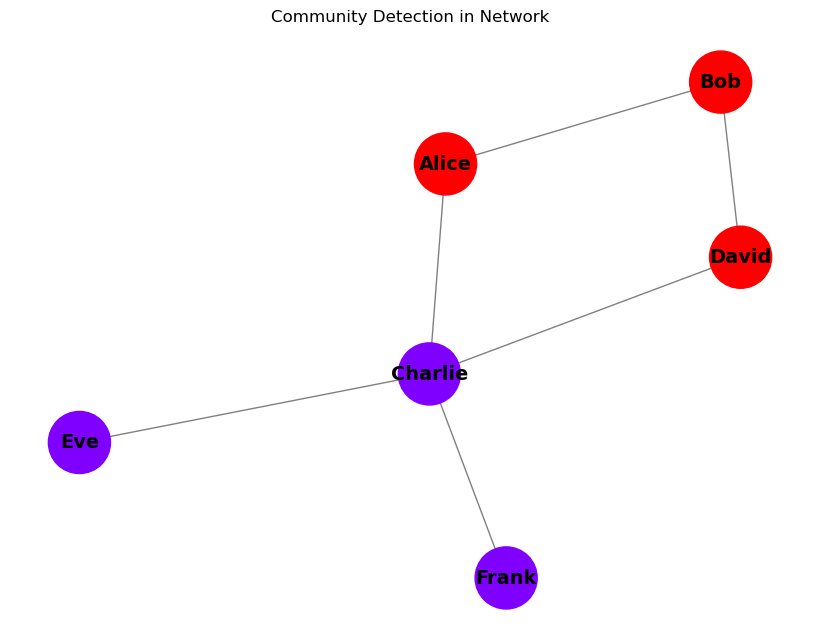

Detected Communities:
Alice: Community 1
Bob: Community 1
Charlie: Community 0
David: Community 1
Eve: Community 0
Frank: Community 0


In [7]:
# Task 11: Detecting Communities in a Social Network**
# Objective: To identify communities or clusters within a social network
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Create a graph object
G = nx.Graph()

# Add nodes and edges (friendships or interactions)
G.add_edges_from([('Alice', 'Bob'), 
                 ('Alice', 'Charlie'), 
                 ('Bob', 'David'), 
                 ('Charlie', 'David'),
                 ('Eve', 'Charlie'),
                 ('Charlie', 'Frank')])

# Use the Louvain method for community detection
partition = community_louvain.best_partition(G)

# Draw the network with communities colored
plt.figure(figsize=(8, 6))

# Get community colors
colors = [partition[node] for node in G.nodes()]

# Draw nodes and edges with colors based on communities
nx.draw(G, with_labels=True, node_size=2000, node_color=colors, cmap=plt.cm.rainbow, font_size=14, font_weight='bold', edge_color='gray')

plt.title("Community Detection in Network")
plt.show()

# Print the detected communities
print("Detected Communities:")
for node, comm in partition.items():
    print(f"{node}: Community {comm}")

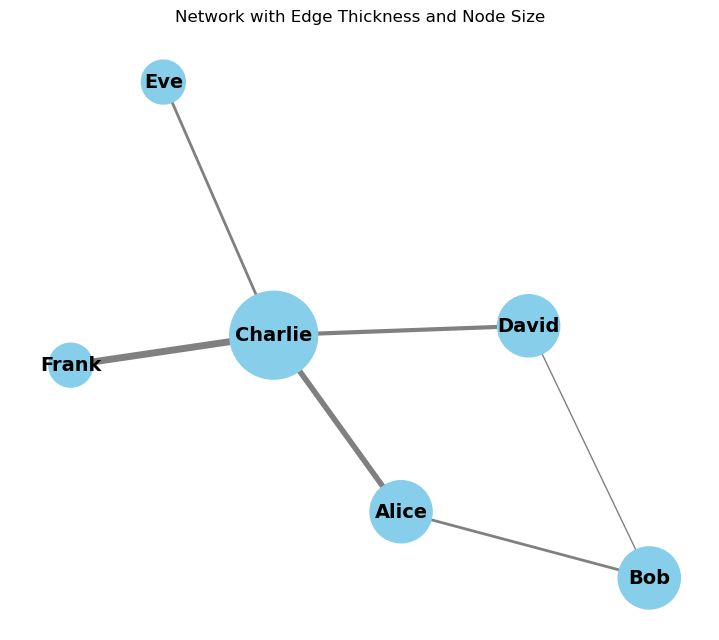

In [3]:
# Task 12: Significance of Edge Thickness and Node Size in Network Visualizations
# Objective: Explore how adjusting edge thickness and node size can help emphasize different aspects of a network
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes and edges with different weights (edge weights represent strength of connection)
G.add_edge('Alice', 'Bob', weight=2)
G.add_edge('Alice', 'Charlie', weight=4)
G.add_edge('Bob', 'David', weight=1)
G.add_edge('Charlie', 'David', weight=3)
G.add_edge('Eve', 'Charlie', weight=2)
G.add_edge('Charlie', 'Frank', weight=5)

# Get edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw the network with varying edge thickness based on weights
plt.figure(figsize=(7, 6))

# Adjust node size based on degree centrality
node_size = [1000 * G.degree(node) for node in G.nodes()]

# Draw the network with edge width based on weight and node size based on degree
nx.draw(G, with_labels=True, node_size=node_size, font_size=14, font_weight='bold', edge_color='gray', width=edge_weights, node_color='skyblue')

plt.title("Network with Edge Thickness and Node Size")
plt.show()



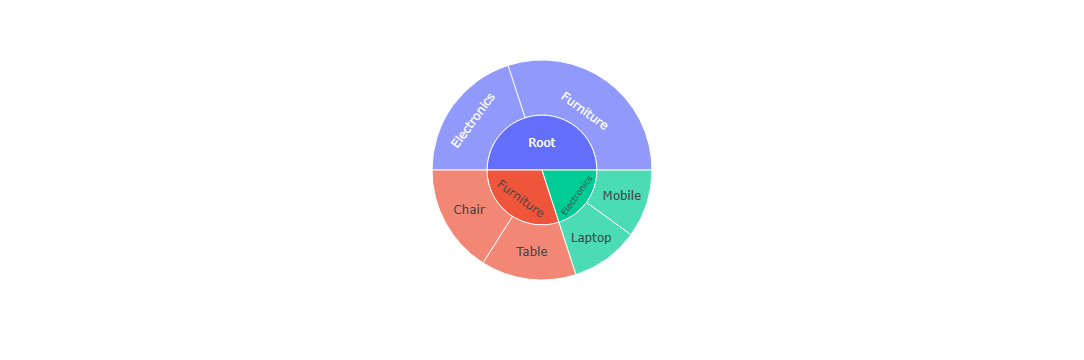

In [17]:
# Task 13: Visualizing Hierarchical Data (Tree/Sunburst Chart)
# Objective:Visualize hierarchical data using `plotly`
import pandas as pd
import plotly.express as px

# Sample hierarchical data (product categories and subcategories)
data = {
    'Parent': ['Root', 'Root', 'Electronics', 'Electronics', 'Furniture', 'Furniture'],
    'Child': ['Electronics', 'Furniture', 'Mobile', 'Laptop', 'Chair', 'Table'],
    'Value': [10, 15, 5, 5, 8, 7]
}

df_hierarchy = pd.DataFrame(data)

# Plot sunburst chart
fig = px.sunburst(df_hierarchy, path=['Parent', 'Child'], values='Value')
fig.show()

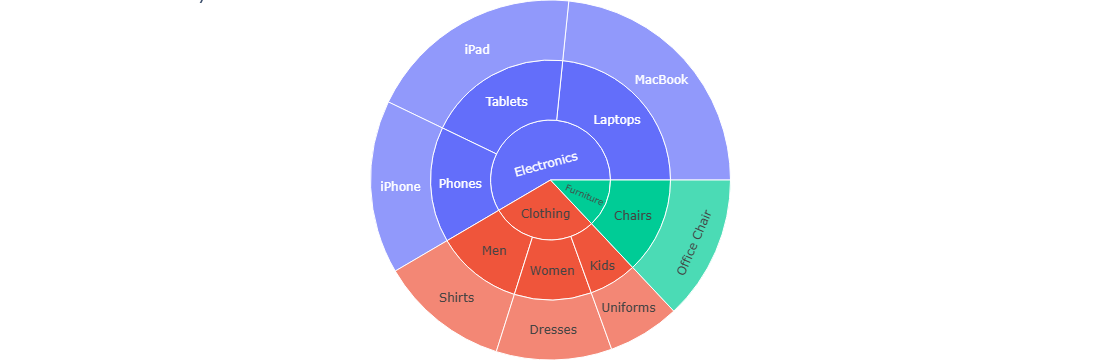

In [16]:
# Day 4: Visualizing Hierarchical Data
# Task 14: Visualizing the Hierarchical Relationship Between Products in a Retail Business
import plotly.express as px
import pandas as pd

# Sample dataset representing a product hierarchy
data = {
    "Category": ["Electronics", "Electronics", "Electronics", "Clothing", "Clothing", "Clothing", "Furniture"],
    "Subcategory": ["Phones", "Laptops", "Tablets", "Men", "Women", "Kids", "Chairs"],
    "Product": ["iPhone", "MacBook", "iPad", "Shirts", "Dresses", "Uniforms", "Office Chair"],
    "Sales": [12000, 18000, 15000, 9000, 8000, 5000, 10000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a sunburst chart
fig = px.sunburst(df, path=['Category', 'Subcategory', 'Product'], values='Sales', 
                  title="Product Hierarchy in Retail Business")
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

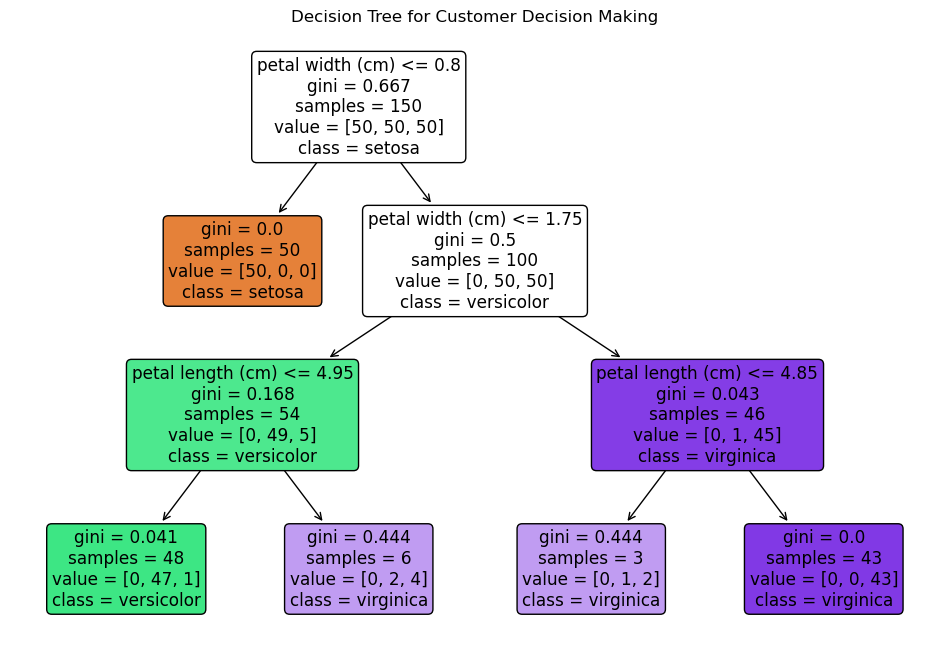

In [6]:
# Day 4: Visualizing Hierarchical Data
# Task 15: Visualizing a Decision Tree Hierarchy
# Example Code for Decision Tree Visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data (using Iris dataset as a placeholder for product/customer decision data)
data = load_iris()
X = data.data
y = data.target

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data.feature_names, class_names=list(data.target_names), filled=True, rounded=True)
plt.title("Decision Tree for Customer Decision Making")
plt.show()
